<a href="https://colab.research.google.com/github/FaithNanzala/AUTOLIB-CAR/blob/main/AUTOLIB_WK4_IP_CORE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WEEK 4 INDEPENDENT PROJECT CORE**

***Autolib electric car-sharing service company ***

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest.

To work on this project, we will perform the following analysis with Python;

Find and deal with outliers, anomalies, and missing data within the dataset. Plot appropriate univariate and bivariate summaries recording our observations. Implement the solution by performing hypothesis testing. This will need to be documented when writing the report.

REPORT LINK : https://docs.google.com/document/d/1AF4P4WvXUm7a1LRd0x_RjtCMoW0ehxpON_xIiuA93nE/edit#heading=h.ww5ag21buy6o

**Problem statement**

Autolib is operated by the Bolloré Group enterprise, which won the contract to develop the service and to supply Paris with electric cars and stations. The program started in 2011 with an initial fleet of 250 eco-friendly electric Blue Cars. The program today has more than 3,000 cars operating on the streets of Paris and within the whole region. There are around 860 Autolib stations where users can subscribe, pick up or drop off the cars. As well, there are 4,400 parking spaces and charging points reserved exclusively for Blue cars. 

The aim of our research is to come up with relevant data on blue cars usage and advice the management on resource allocation based on our findings.

**Objective**

Our main objective is to find out if there is a difference between the number of blue cars taken on weekdays from postal codes 75011 and 75015. To guide the decision making process, based on our findings, we will be able to formulate an hyphothesis and further test it through statistical models. Depending on the test results we will be able to come up with an informed decision for Autolib team.

The intial stages of our analysis will cover basic data cleanning and processing to refine our data for proper analysis

External Source Validation

Our measurements are in line with what has been recorded. We got our external source validation and confirmed our dataset from Autolib Car sharing company.

**Importing the libraries**

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_1samp
from scipy import stats
from scipy.stats import norm



In [40]:
#Loading our dataset
autolib = pd.read_csv('autolib_daily_events_postal_code.csv')
autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [41]:
description = pd.read_excel("columns_explanation.xlsx")
description


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


**Checking the data**

In [42]:
# Previewing the top of our autolib  dataset
autolib.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [43]:
# Previewing the bottom of our autolib  dataset
autolib.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [44]:
#Accessing the information
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [45]:
#checking the data types for our attributes
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [46]:
#Determining the no. of records in our dataset

autolib.shape

(16085, 13)

In [47]:
#Previewing dataset columns
autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [48]:
#undertaking our descriptive analysis
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


**Data Cleaning**


1.   validity
2.   accuracy
3.   completeness
4.   consistency
5.   uniformity









In [49]:
#removing spaces and changing column names to lowercase
autolib.columns = autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_').str.replace(',','')
autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [50]:
# Renaming our columns from
autolib.rename(columns={'dayofweek':'day_of_week','n_daily_data_points':'daily_data_points'}, inplace= True)
autolib.head()

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [51]:
# checking the missing data
autolib.isnull().sum()
##no missing values

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [52]:
#checking for duplicates
autolib.duplicated().sum()
##the dataset has no duplicates

0

In [53]:
#Selecting columns with information that is relevant to our research
AUTOLIB = autolib[['postal_code','day_type','bluecars_taken_sum','bluecars_returned_sum']]
AUTOLIB.head()

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,weekday,110,103
1,75001,weekday,98,94
2,75001,weekday,138,139
3,75001,weekday,104,104
4,75001,weekday,114,117


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


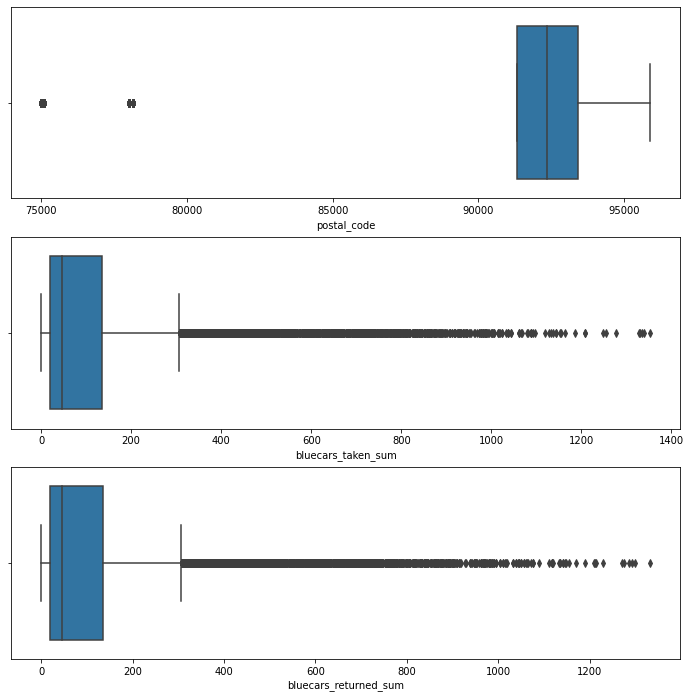

In [54]:
#Checking for outliers
fig, ((A1),(A2),(A3)) = plt.subplots(3 ,figsize=(12, 12))
#fig.subtitle('Boxplots')
print('\n')
sns.boxplot(AUTOLIB['postal_code'], ax=A1)
sns.boxplot(AUTOLIB['bluecars_taken_sum'], ax=A2)
sns.boxplot(AUTOLIB['bluecars_returned_sum'], ax=A3)
plt.show()

Blue cars returned and blue cars taken have many outliers explained by how the distribution is skewed to the right whereas postal code, has two extreme outliers which can be explained by the postal code allocation. The data is skewed to the right and a few outliers on the left. However,we will not remove the outliers in it.



In [55]:
#We will use log transformtion to deal with outliers without deleting them since its best suited for positively skewed data.
#However we will creat a copy of AUTOLIB to avoid affecting it when welog transform

AUTOLIB1= AUTOLIB.copy()
AUTOLIB1.head()

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,weekday,110,103
1,75001,weekday,98,94
2,75001,weekday,138,139
3,75001,weekday,104,104
4,75001,weekday,114,117


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


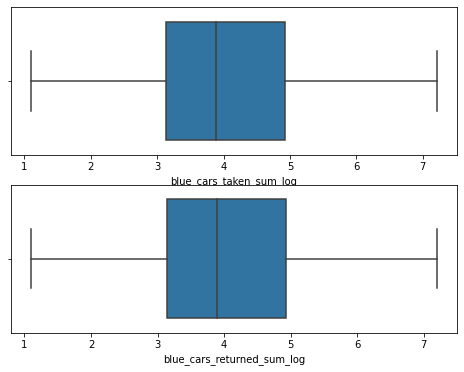

In [56]:
#Added 3 to completely remove the outliers.
AUTOLIB1['blue_cars_returned_sum_log']= np.log(AUTOLIB1.bluecars_returned_sum+3)
AUTOLIB1['blue_cars_taken_sum_log']= np.log(AUTOLIB1.bluecars_taken_sum+3)

#We will then confirm if our data has changed
fig, ((A2),(A3)) = plt.subplots(2 ,figsize=(8, 6))
sns.boxplot(AUTOLIB1['blue_cars_taken_sum_log'], ax=A2)
sns.boxplot(AUTOLIB1['blue_cars_returned_sum_log'], ax=A3)
plt.show()
#Our data has no more outliers and is perfectly normally distributed as shown below, this will help us work better with it.

In [57]:
#displayingduplicated rows
AUTOLIB[AUTOLIB.duplicated()].head(10)

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
24,75001,weekday,130,130
36,75001,weekday,118,118
46,75001,weekday,130,130
51,75001,weekday,116,116
62,75001,weekday,118,118
83,75001,weekday,103,103
86,75001,weekend,192,193
91,75001,weekday,118,118
97,75001,weekday,125,125
102,75001,weekday,122,122


In [58]:
#Check for number of duplicated rows
len(AUTOLIB[AUTOLIB.duplicated()])

1833

In [59]:
# dropping duplicated rows to reduce on our errors
autolib.drop_duplicates(inplace= True)

**Exploratory Data Analysis**


**Univariate analysis**

Bar graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


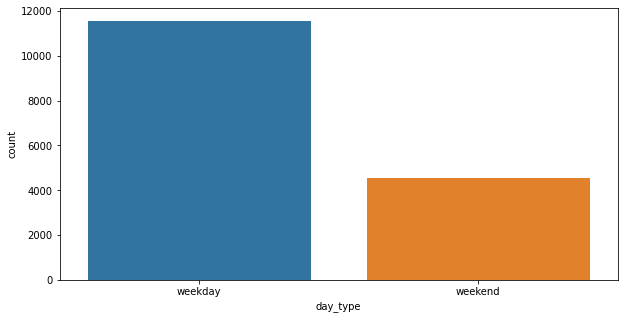

In [60]:
plt.figure(figsize=(10, 5))
sns.countplot(autolib.day_type,order = autolib.day_type.value_counts().index)

Weekdays definitely have more blue cars usage as opposed to weekends

Histograms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


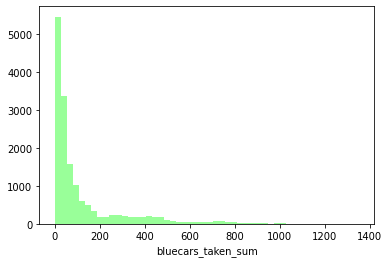

In [61]:
# Plotting a histogram for bluecars taken
sns.distplot(AUTOLIB['bluecars_taken_sum'], kde = False, color = 'lime')


According to the histogram our data is skewed to the right meaning that most data falls to the positive side of the graph.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


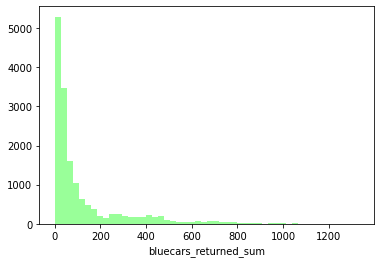

In [62]:
# Plotting a histogram for blue cars returned
sns.distplot(AUTOLIB['bluecars_returned_sum'], kde = False, color = 'lime')


According to the histogram our data is skewed to the right meaning that most data falls to the positive side of the graph..

**Bivariate Analysis**

In [63]:
#Correlation using a correlation table
AUTOLIB.corr()

,postal_code,bluecars_taken_sum,bluecars_returned_sum
postal_code,1.000000,-0.69802,-0.697519
bluecars_taken_sum,-0.698020,1.00000,0.998660
bluecars_returned_sum,-0.697519,0.99866,1.000000


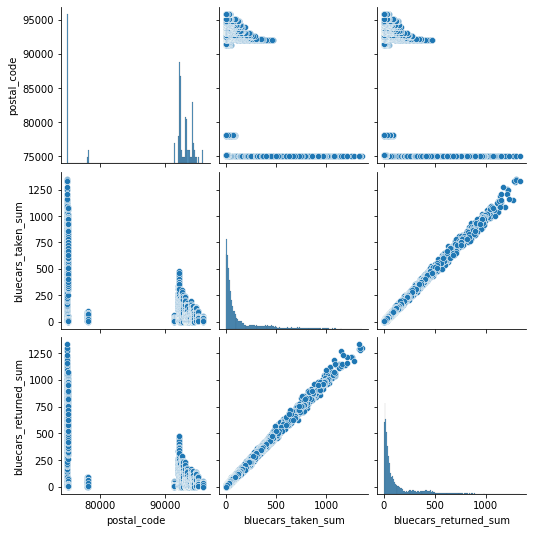

In [64]:
#Plotting a pair plot
sns.pairplot(AUTOLIB)


The correlation between the blue cars taken and blue cars returned is positive as opposed to Postal code which seem to have a separeted graph due to the nature of postal code allocation.

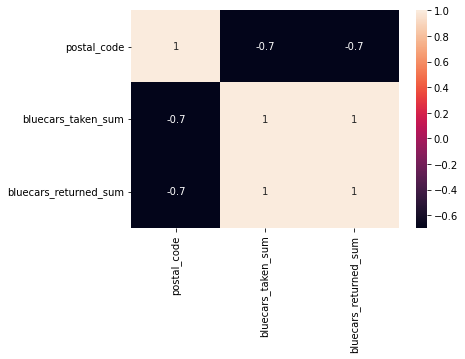

In [65]:
#correlation using a heatmap
sns.heatmap(AUTOLIB.corr(),annot=True)
plt.show()

There is a positive correlation of 1 between bluecars taken and bluecars returned.

**Hypothesis Testing**

The Data Scientist for the Autolib electric car-sharing service company are interested to test if there is a difference between the number of blue cars taken on weekdays from postal code 75011 and postal code 75015


The null hypothesis is there is no difference between the number of Bluecars taken on Weekdays from postal code 75011 and postal code 75015.

The alternative hypothesis states that there is a difference in the two.

We will use alpha as 0.025 due and P-value as 0.05

In [66]:
# selecting a random sample
sample= AUTOLIB.sample(n= 1000,replace=False)
sample
#we did random sampling because it gives equal chance to all the data to be a part of our sample.


,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
11561,93350,weekday,15,9
12466,93500,weekday,32,41
5707,92170,weekend,71,77
2889,75019,weekday,421,446
3925,91330,weekend,13,17
...,...,...,...,...
9761,92700,weekday,127,107
10186,93110,weekday,18,19
9079,92410,weekend,8,7
2753,75018,weekend,549,570


In [67]:
#postal code 75015 sample data
s75015 =sample.loc[sample['postal_code'] == 75015]
s75015.head()

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
2321,75015,weekday,1089,1039
2333,75015,weekday,920,970
2190,75015,weekend,913,971
2317,75015,weekday,861,843
2339,75015,weekday,49,52


In [68]:
#selectingweekdays data
weekdays=s75015[s75015['day_type'].str.contains("weekday")]
weekdays

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
2321,75015,weekday,1089,1039
2333,75015,weekday,920,970
2317,75015,weekday,861,843
2339,75015,weekday,49,52
2287,75015,weekday,774,763
2261,75015,weekday,813,828
2215,75015,weekday,880,837
2252,75015,weekday,766,801
2199,75015,weekday,810,773
2318,75015,weekday,888,892


In [88]:
#list of blue cars taken in postal code 75015 on weekdays
takenlist = weekdays['bluecars_taken_sum'].tolist()
takenlist

[1089, 920, 861, 49, 774, 813, 880, 766, 810, 888, 756, 794, 751]

In [87]:
# population average
avgpop= 126
# sample av
avgsample=125
# sample size
n = 1000

# standard deviation of population
stdsample = 182
# finish t- calculation
t= (sample_av-pop_av)/(std_sample/n**(1/2))
# t-statistic
t

-0.17375151978947137

In [92]:
#degrees of freedom
df = n - 1


#calculate the critical value
#alpha is our confidence level
alpha = 0.025


#ppf is percent point function
critical_value = round(stats.t.ppf(q=alpha, df=df), 5)
critical_value

-1.96234

In [90]:
#p-value calculation
pvalue = stats.norm.cdf(t_critical_value)
pvalue

0.02486145658322001

In [89]:
if pvalue<= 0.05:
  print("Reject null hypothesis")
else:
  print("Do not reject null hypothesis") 

Reject null hypothesis


**CONCLUSION**

We got a p-value of 0.0248 in our test result wich was less than 0.05 hence rejecting the null hypothesis and favor of the alternative hypothesis that the difference between the number of blue cars taken on weekdays from area code 75011 and area 75015 is statistically significant with a p-value of 0.05 and below the alpha of 0.025.

Therefore, we conclude that our study supports the alternative hypothesis that there is a difference between the number of blue cars taken on weekdays from area code 75011 and area 75015.
